# Binding Energy per Nucleon

We can explore and plot the binding energy per nucleon to understand when fusion and fission operate.

In [1]:
import pynucastro as pyna

First we'll get all nuclei with known masses and look at the binding energy

In [2]:
nuclei = pyna.get_all_nuclei()

In [3]:
len(nuclei)

3558

We see there are > 3500 nuclei with measured masses

## Most tightly bound nucleus

We can easily find the nucleus that is most tightly bound

In [4]:
nuc_bound = max(nuclei, key=lambda n : n.nucbind)
nuc_bound

Ni62

## Binding energy plot

Now we can make a plot of binding energy per nucleon for all nuclei

In [5]:
As = [n.A for n in nuclei]
BEs = [n.nucbind for n in nuclei]

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'binding energy per nucleon')

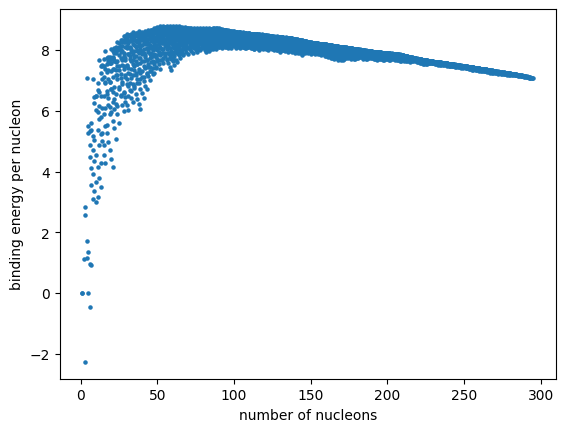

In [7]:
fig, ax = plt.subplots()
ax.scatter(As, BEs, s=5)
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon")

## Cleaner plot

We see that there is quite a spread in binding energy for each nucleon count.  If you look at the [version of the plot on Wikipedia](https://commons.wikimedia.org/wiki/File:Binding_energy_curve_-_common_isotopes.svg), it is much cleaner, because they only use a few nuclei.

We can recreate that by using the same nuclei

In [8]:
nuc = ["H1", "H2", "H3", "He3", "He4",
       "Li6", "Li7", "Be9", "B10", "B11",
       "C12", "C13", "N14", "O16", "F19",
       "Ne20", "Na23", "Mg24", "Al27", "Si28",
       "P31", "S32", "Cl35", "Cl37", "K39",
       "Ar40", "Ca40", "Sc45", "Ti48", "V51",
       "Cr52", "Mn55", "Fe56", "Ni58", "Co59",
       "Ni60", "Cu63", "Zn64", "Cu65", "Zn66",
       "Zn68", "Ga68", "Ge70", "Ga71", "Ge72",
       "Ge74", "As75", "Se78", "Br79", "Se80",
       "Br81", "Kr84", "Rb85", "Sr88", "Zr90",
       "Nb93", "Zr94", "Mo95", "Mo96", "Mo98",
       "Tc98", "Ru102", "Rh103", "Pd105", "Pd106",
       "Ag107", "Pd108", "Ag109", "Cd112", "Cd114",
       "In115", "Sn118", "Sn120", "Sb121", "Sb123",
       "I127", "Te128", "Xe129", "Te130", "Xe131",
       "Xe132", "Cs133", "Ba138", "La139", "Ce140",
       "Pr141", "Nd142", "Pm145", "Eu151", "Sm152",
       "Eu153", "Sm154", "Gd156", "Gd158", "Dy162",
       "Dy163", "Dy164", "Ho165", "Er166", "Er167",
       "Er168", "Tm169", "Yb172", "Lu175", "Hf178",
       "Hf180", "Ta181", "W182", "W184", "Re185",
       "W186", "Re187", "Os190", "Ir191", "Os120",
       "Ir193", "Pt194", "Pt195", "Pt196", "Au197",
       "Hg200", "Hg202", "Tl203", "Tl205", "Pb206",
       "Pb208", "Bi209", "Po209", "At210", "Rn222",
       "Fr223", "Ra226", "Ac227", "Pa231", "Th232",
       "U235", "U238"]

new_nuc = [pyna.Nucleus(name) for name in nuc]

In [9]:
As = [n.A for n in new_nuc]
BEs = [n.nucbind for n in new_nuc]

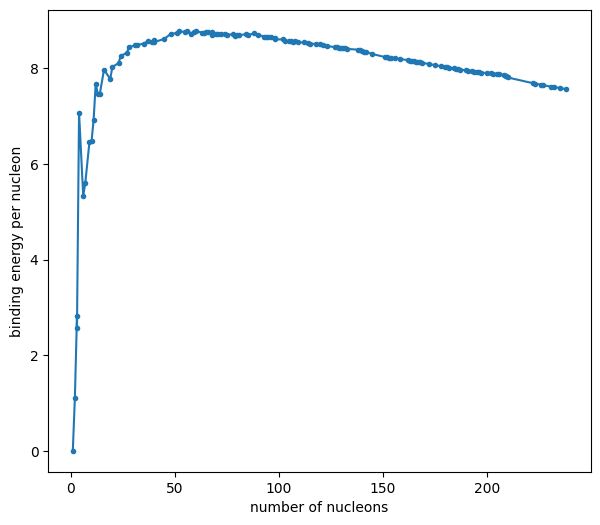

In [10]:
fig, ax = plt.subplots()
ax.plot(As, BEs, marker="o", markersize="3")
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon")
fig.set_size_inches((7, 6))

## Visualizing as function of (N, Z)

We want to visualize the mass excess and binding energy in the $Z$-$N$ plane.
First let's get the extent of $N$ and $Z$ in our nucleus list.

In [11]:
max_Z = max(nuclei, key=lambda n : n.Z).Z
max_N = max(nuclei, key=lambda n : n.N).N

and the maximum absolute value of the mass excess (in MeV)

In [12]:
dm_mag = abs(max(nuclei, key=lambda n: abs(n.dm)).dm)
dm_mag

201.37

Now we'll create an array to store dm(Z, N) and be(Z, N) and loop over all the nuclei and store each mass excess and binding energy / nucleon.

In [13]:
import numpy as np
dm = np.zeros((max_Z+1, max_N+1))
be = np.zeros((max_Z+1, max_N+1))

We'll initialize these to NaN so we can mask out the regions where there are no nuclei

In [14]:
dm[:,:] = np.nan
be[:,:] = np.nan

In [15]:
for n in nuclei:
    dm[n.Z, n.N] = n.dm
    be[n.Z, n.N] = n.nucbind

```{note}
Due to mass excess estimation in the nuclear databases, a few nuclei have negative binding energies.
```

In [16]:
n = [n for n in nuclei if n.nucbind < 0]
n

[Li3, B6]

Finally, we can plot

In [17]:
import matplotlib as mpl

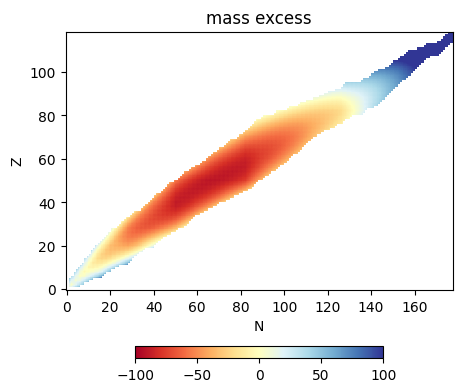

In [18]:
# mask out the regions with no nuclei
cmap = mpl.colormaps['RdYlBu']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(dm, origin="lower", cmap="RdYlBu",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)

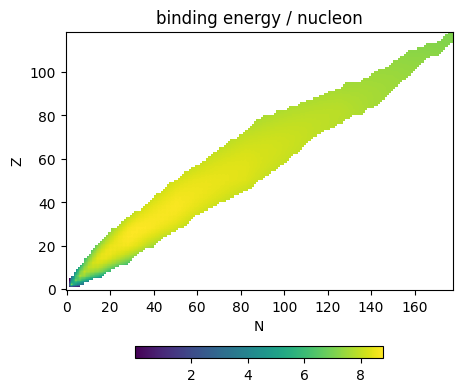

In [19]:
# mask out the regions with no nuclei
cmap = mpl.colormaps['viridis']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(be, origin="lower", cmap=cmap,
               vmin=0.01, vmax=np.nanmax(be))
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("binding energy / nucleon")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)